In [1]:
# Required libraries
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np # Import the Numpy package
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
from datetime import datetime
from glob import glob
import os
from utils import brigthness_temp

# Converts the CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
# Makes a linear interpolation with the CPT file
cpt_convert = LinearSegmentedColormap('cpt', cpt)

In [2]:
path = '/work/mh0731/m300382/sat/ilona/'

fname=path+"W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG2+SEVIRI_C_EUMG_20140119134510.nc"
# Search for the Scan Start in the file name
time = (fname[fname.find("MG_")+3:fname.find(".nc")])
# Format the "Observation Start" string
date = datetime.strptime(time,'%Y%m%d%H%M%S')

# Check if we already created the image
image_string='./images/'+datetime.strftime(date,'%Y%m%d%H%M%S')+'.png'

print('Using '+fname)
# Open the file using the NetCDF4 library
nc = Dataset(fname)
# Extract the Brightness Temperature values from the NetCDF    
temp_b = brigthness_temp(nc.variables['ch9'])

lons = np.ma.masked_less(nc.variables['lon'][:], -180)
lats = np.ma.masked_less(nc.variables['lat'][:], -90)
bmap = Basemap(projection='cyl', llcrnrlon=-8, llcrnrlat=35, urcrnrlon=21, urcrnrlat=45, resolution='i')
# Draw the coastlines, countries, parallels and meridians
x,y=bmap(lons,lats)

Using /work/mh0731/m300382/sat/ilona/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG2+SEVIRI_C_EUMG_20140119134510.nc


/work/mh0731/m300382/conda_envs/my_env/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/work/mh0731/m300382/conda_envs/my_env/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


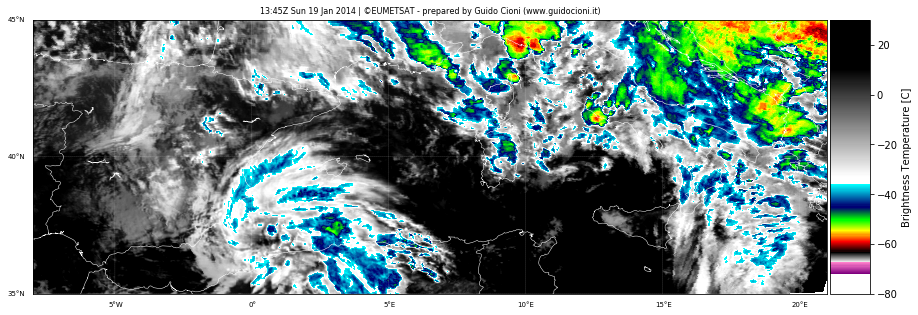

In [3]:
fig=plt.figure(figsize=(15, 15))

# bmap.contourf(x,y,temp_b,vmin=-80,vmax=30, cmap=cpt_convert, extend="both")
# pcolormesh is faster!! 
bmap.pcolormesh(x, y, temp_b, vmin=-80, vmax=30, cmap=cpt_convert)
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
bmap.drawparallels(np.arange(-90.0, 90.0, 5.), linewidth=0.2, color='white',
                   labels=[True, False, False, True], fontsize=7)
bmap.drawmeridians(np.arange(0.0, 360.0, 5.), linewidth=0.2, color='white',
                   labels=[True, False, False, True], fontsize=7)

# Insert the legend
bmap.colorbar(location='right', label='Brightness Temperature [C]', fraction=0.046, pad=0.04)
date_formatted = datetime.strftime(date,'%H:%MZ %a %d %b %Y')
plt.title(date_formatted+" | "+u"\N{COPYRIGHT SIGN}"+'EUMETSAT - prepared by Guido Cioni (www.guidocioni.it)',
          fontsize=8)
plt.show()
#     plt.savefig('./images/%s.png' % datetime.strftime(date,'%Y%m%d%H%M%S'), bbox_inches='tight', dpi=200)

In [ ]:
path = '/work/mh0731/m300382/sat/ilona/'

fnames=sorted(glob(path+"*.nc"))
first=True
coords=[]

for fname in fnames[35:340]:
    # Search for the Scan Start in the file name
    time = (fname[fname.find("MG_")+3:fname.find(".nc")])
    # Format the "Observation Start" string
    date = datetime.strptime(time,'%Y%m%d%H%M%S')

    image_string='./images/'+datetime.strftime(date,'%Y%m%d%H%M%S')+'.png'

    print('Using '+fname)
    # Open the file using the NetCDF4 library
    nc = Dataset(fname)
    # Extract the Brightness Temperature values from the NetCDF    
    temp_b = brigthness_temp(nc.variables['ch9'])
    
    if first:
        lons = np.ma.masked_less(nc.variables['lon'][:], -180)
        lats = np.ma.masked_less(nc.variables['lat'][:], -90)
        bmap = Basemap(projection='cyl', llcrnrlon=-8, llcrnrlat=35, urcrnrlon=21, urcrnrlat=45, resolution='i')
        # Draw the coastlines, countries, parallels and meridians
        x,y = bmap(lons,lats)
        first = False 

    # Get coordinates on click
    i = 0
    def onclick(event):
        global ix, iy
        ix, iy = event.xdata, event.ydata
        coords.append((ix, iy))
        print("clicked "+str(coords))
        plt.clf()

    plt.ion()
    fig = plt.figure(figsize=(15, 15))

    bmap.pcolormesh(x, y, temp_b, vmin=-80, vmax=30, cmap=cpt_convert)
    bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
    bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
    bmap.drawparallels(np.arange(-90.0, 90.0, 5.), linewidth=0.2, color='white',
                       labels=[True, False, False, True], fontsize=7)
    bmap.drawmeridians(np.arange(0.0, 360.0, 5.), linewidth=0.2, color='white',
                       labels=[True, False, False, True], fontsize=7)

    # Insert the legend
    bmap.colorbar(location='right', label='Brightness Temperature [C]', fraction=0.046, pad=0.04)
    date_formatted = datetime.strftime(date,'%H:%MZ %a %d %b %Y')
    plt.title(date_formatted+" | "+u"\N{COPYRIGHT SIGN}"+'EUMETSAT - prepared by Guido Cioni (www.guidocioni.it)',
              fontsize=8)

    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show(block=True)

np.savetxt('coords.txt', np.array(coords), fmt='%5.3f', header='longitude latitude')

In [2]:
traiettoria=np.loadtxt('traiettoria_obs_new.txt')

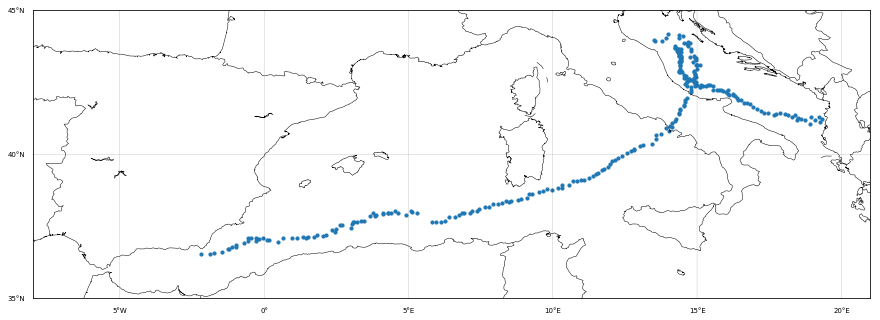

In [20]:
fig = plt.figure(figsize=(15, 15))

bmap.scatter(traiettoria[:,1],traiettoria[:,2], s=10)
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 5.), linewidth=0.2, color='black',
                       labels=[True, False, False, True], fontsize=7)
bmap.drawmeridians(np.arange(0.0, 360.0, 5.), linewidth=0.2, color='black',
                       labels=[True, False, False, True], fontsize=7)

plt.show()

In [7]:
import scipy.interpolate as interp
def interpolate_polyline(polyline, num_points):
    duplicates = []
    for i in range(1, len(polyline)):
        if np.allclose(polyline[i], polyline[i-1]):
            duplicates.append(i)
    if duplicates:
        polyline = np.delete(polyline, duplicates, axis=0)
    tck, u = interp.splprep(polyline.T, s=0)
    u = np.linspace(0.0, 1.0, num_points)
    return np.column_stack(interp.splev(u, tck))

In [25]:
traiettoria_interpolata = interpolate_polyline(traiettoria[:,1:3], 30)

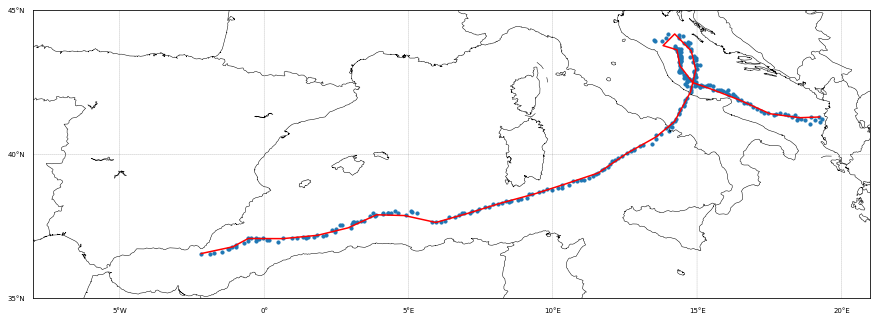

In [26]:
fig = plt.figure(figsize=(15, 15))

bmap.scatter(traiettoria[:,1],traiettoria[:,2], s=10)
bmap.plot(traiettoria_interpolata[:,0],traiettoria_interpolata[:,1], color='red')
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 5.), linewidth=0.2, color='black',
                       labels=[True, False, False, True], fontsize=7)
bmap.drawmeridians(np.arange(0.0, 360.0, 5.), linewidth=0.2, color='black',
                       labels=[True, False, False, True], fontsize=7)

plt.show()